In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_Orders=pd.read_csv('D:\Projects\Project- Return Rate Analysis\Ecommerce Orders-Raw.csv')

In [13]:
df_Orders.shape

(10000, 15)

In [14]:
df_Orders.head()

,order id,product id,user id,order date,product category,product price,order quantity,user age,user gender,user city,user country,payment method,shipping method,discount applied,return status
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,Clothing,411.59,3,58,Male,New York,USA,Debit Card,Next-Day,45.27,Returned
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,Books,288.88,3,68,Female,London,UK,Credit Card,Express,47.79,Returned
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,Toys,390.03,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,26.64,Not Returned
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,Toys,401.09,3,40,Male,Paris,France,PayPal,Next-Day,15.37,Not Returned
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,Books,110.09,4,34,Female,Tokyo,Japan,Gift Card,Standard,16.37,Not Returned


In [15]:
df_Orders.tail()

,order id,product id,user id,order date,product category,product price,order quantity,user age,user gender,user city,user country,payment method,shipping method,discount applied,return status
9995,ORD00009995,PROD00009995,USER00009995,20-10-2023,Home,142.50,4,37,Male,Woodlands,Singapore,PayPal,Standard,34.27,Not Returned
9996,ORD00009996,PROD00009996,USER00009996,25-02-2023,Electronics,484.63,3,69,Male,Phoenix,USA,Debit Card,Express,25.44,Not Returned
9997,ORD00009997,PROD00009997,USER00009997,10-05-2024,Toys,386.57,5,46,Male,Mumbai,India,Credit Card,Next-Day,12.67,Not Returned
9998,ORD00009998,PROD00009998,USER00009998,13-02-2024,Toys,129.22,1,34,Female,Berlin,Germany,Gift Card,Express,49.97,Not Returned
9999,ORD00009999,PROD00009999,USER00009999,08-12-2024,Toys,459.42,5,24,Female,Phoenix,USA,Debit Card,Express,16.05,Returned


In [16]:
df_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order id          10000 non-null  object 
 1   product id        10000 non-null  object 
 2   user id           10000 non-null  object 
 3   order date        10000 non-null  object 
 4   product category  10000 non-null  object 
 5   product price     10000 non-null  float64
 6   order quantity    10000 non-null  int64  
 7   user age          10000 non-null  int64  
 8   user gender       10000 non-null  object 
 9   user city         10000 non-null  object 
 10  user country      10000 non-null  object 
 11  payment method    10000 non-null  object 
 12  shipping method   10000 non-null  object 
 13  discount applied  10000 non-null  float64
 14  return status     10000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 1.1+ MB


In [17]:
df_Orders.duplicated().sum()

np.int64(0)

In [18]:
df_Orders.describe()

,product price,order quantity,user age,discount applied
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,252.369307,3.006100,44.195000,24.992162
std,142.883865,1.406791,15.311983,14.363396
min,5.010000,1.000000,18.000000,0.000000
25%,128.650000,2.000000,31.000000,12.752500
50%,250.445000,3.000000,44.000000,24.840000
75%,377.837500,4.000000,57.000000,37.605000
max,499.890000,5.000000,70.000000,50.000000


In [19]:
df_Orders.columns=df_Orders.columns.str.upper()

In [20]:
df_Orders.columns=df_Orders.columns.str.replace(" ","_")

In [21]:
df_Orders.head()

,ORDER_ID,PRODUCT_ID,USER_ID,ORDER_DATE,PRODUCT_CATEGORY,PRODUCT_PRICE,ORDER_QUANTITY,USER_AGE,USER_GENDER,USER_CITY,USER_COUNTRY,PAYMENT_METHOD,SHIPPING_METHOD,DISCOUNT_APPLIED,RETURN_STATUS
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,Clothing,411.59,3,58,Male,New York,USA,Debit Card,Next-Day,45.27,Returned
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,Books,288.88,3,68,Female,London,UK,Credit Card,Express,47.79,Returned
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,Toys,390.03,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,26.64,Not Returned
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,Toys,401.09,3,40,Male,Paris,France,PayPal,Next-Day,15.37,Not Returned
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,Books,110.09,4,34,Female,Tokyo,Japan,Gift Card,Standard,16.37,Not Returned


In [22]:
df_Orders['PRODUCT_CATEGORY'].unique()

array(['Clothing', 'Books', 'Toys', 'Electronics', 'Home'], dtype=object)

In [23]:
df_Orders['USER_GENDER'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df_Orders['PAYMENT_METHOD'].unique()

array(['Debit Card', 'Credit Card', 'PayPal', 'Gift Card'], dtype=object)

In [25]:
df_Orders['RETURN_STATUS'].unique()

array(['Returned', 'Not Returned'], dtype=object)

In [26]:
df_Orders.dtypes

ORDER_ID             object
PRODUCT_ID           object
USER_ID              object
ORDER_DATE           object
PRODUCT_CATEGORY     object
PRODUCT_PRICE       float64
ORDER_QUANTITY        int64
USER_AGE              int64
USER_GENDER          object
USER_CITY            object
USER_COUNTRY         object
PAYMENT_METHOD       object
SHIPPING_METHOD      object
DISCOUNT_APPLIED    float64
RETURN_STATUS        object
dtype: object

In [27]:
df_Orders['ORDER_DATE']=pd.to_datetime(df_Orders['ORDER_DATE'],format="%d-%m-%Y")

In [28]:
df_Orders.dtypes

ORDER_ID                    object
PRODUCT_ID                  object
USER_ID                     object
ORDER_DATE          datetime64[ns]
PRODUCT_CATEGORY            object
PRODUCT_PRICE              float64
ORDER_QUANTITY               int64
USER_AGE                     int64
USER_GENDER                 object
USER_CITY                   object
USER_COUNTRY                object
PAYMENT_METHOD              object
SHIPPING_METHOD             object
DISCOUNT_APPLIED           float64
RETURN_STATUS               object
dtype: object

In [29]:
df_Orders.head()

,ORDER_ID,PRODUCT_ID,USER_ID,ORDER_DATE,PRODUCT_CATEGORY,PRODUCT_PRICE,ORDER_QUANTITY,USER_AGE,USER_GENDER,USER_CITY,USER_COUNTRY,PAYMENT_METHOD,SHIPPING_METHOD,DISCOUNT_APPLIED,RETURN_STATUS
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,Clothing,411.59,3,58,Male,New York,USA,Debit Card,Next-Day,45.27,Returned
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,Books,288.88,3,68,Female,London,UK,Credit Card,Express,47.79,Returned
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,Toys,390.03,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,26.64,Not Returned
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,Toys,401.09,3,40,Male,Paris,France,PayPal,Next-Day,15.37,Not Returned
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,Books,110.09,4,34,Female,Tokyo,Japan,Gift Card,Standard,16.37,Not Returned


In [30]:
df_Orders['ORDER_AMOUNT']=df_Orders['PRODUCT_PRICE']*df_Orders['ORDER_QUANTITY']-df_Orders['DISCOUNT_APPLIED']

In [31]:
df_Orders

,ORDER_ID,PRODUCT_ID,USER_ID,ORDER_DATE,PRODUCT_CATEGORY,PRODUCT_PRICE,ORDER_QUANTITY,USER_AGE,USER_GENDER,USER_CITY,USER_COUNTRY,PAYMENT_METHOD,SHIPPING_METHOD,DISCOUNT_APPLIED,RETURN_STATUS,ORDER_AMOUNT
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,Clothing,411.59,3,58,Male,New York,USA,Debit Card,Next-Day,45.27,Returned,1189.50
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,Books,288.88,3,68,Female,London,UK,Credit Card,Express,47.79,Returned,818.85
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,Toys,390.03,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,26.64,Not Returned,1923.51
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,Toys,401.09,3,40,Male,Paris,France,PayPal,Next-Day,15.37,Not Returned,1187.90
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,Books,110.09,4,34,Female,Tokyo,Japan,Gift Card,Standard,16.37,Not Returned,423.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD00009995,PROD00009995,USER00009995,2023-10-20,Home,142.50,4,37,Male,Woodlands,Singapore,PayPal,Standard,34.27,Not Returned,535.73
9996,ORD00009996,PROD00009996,USER00009996,2023-02-25,Electronics,484.63,3,69,Male,Phoenix,USA,Debit Card,Express,25.44,Not Returned,1428.45
9997,ORD00009997,PROD00009997,USER00009997,2024-05-10,Toys,386.57,5,46,Male,Mumbai,India,Credit Card,Next-Day,12.67,Not Returned,1920.18
9998,ORD00009998,PROD00009998,USER00009998,2024-02-13,Toys,129.22,1,34,Female,Berlin,Germany,Gift Card,Express,49.97,Not Returned,79.25


In [32]:
df_Orders['USER_GENDER_BINARY']=df_Orders['USER_GENDER'].map({'Female':0,'Male':1})

In [33]:
df_Orders['RETURN_STATUS_BINARY']=df_Orders['RETURN_STATUS'].map({'Not Returned':0,'Returned':1})

In [34]:
df_Orders

,ORDER_ID,PRODUCT_ID,USER_ID,ORDER_DATE,PRODUCT_CATEGORY,PRODUCT_PRICE,ORDER_QUANTITY,USER_AGE,USER_GENDER,USER_CITY,USER_COUNTRY,PAYMENT_METHOD,SHIPPING_METHOD,DISCOUNT_APPLIED,RETURN_STATUS,ORDER_AMOUNT,USER_GENDER_BINARY,RETURN_STATUS_BINARY
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,Clothing,411.59,3,58,Male,New York,USA,Debit Card,Next-Day,45.27,Returned,1189.50,1,1
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,Books,288.88,3,68,Female,London,UK,Credit Card,Express,47.79,Returned,818.85,0,1
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,Toys,390.03,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,26.64,Not Returned,1923.51,0,0
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,Toys,401.09,3,40,Male,Paris,France,PayPal,Next-Day,15.37,Not Returned,1187.90,1,0
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,Books,110.09,4,34,Female,Tokyo,Japan,Gift Card,Standard,16.37,Not Returned,423.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD00009995,PROD00009995,USER00009995,2023-10-20,Home,142.50,4,37,Male,Woodlands,Singapore,PayPal,Standard,34.27,Not Returned,535.73,1,0
9996,ORD00009996,PROD00009996,USER00009996,2023-02-25,Electronics,484.63,3,69,Male,Phoenix,USA,Debit Card,Express,25.44,Not Returned,1428.45,1,0
9997,ORD00009997,PROD00009997,USER00009997,2024-05-10,Toys,386.57,5,46,Male,Mumbai,India,Credit Card,Next-Day,12.67,Not Returned,1920.18,1,0
9998,ORD00009998,PROD00009998,USER00009998,2024-02-13,Toys,129.22,1,34,Female,Berlin,Germany,Gift Card,Express,49.97,Not Returned,79.25,0,0


In [36]:
df_Returns=pd.read_csv('D:\Projects\Project- Return Rate Analysis\Ecommerce Returns-Raw.csv')

In [37]:
df_Returns.shape

(10000, 4)

In [38]:
df_Returns.head()

,order id,return date,return reason,days to return
0,ORD00000000,24-08-2023,Changed mind,19.0
1,ORD00000001,02-11-2023,Wrong item,24.0
2,ORD00000002,NaN,NaN,NaN
3,ORD00000003,NaN,NaN,NaN
4,ORD00000004,NaN,NaN,NaN


In [39]:
df_Returns.tail()

,order id,return date,return reason,days to return
9995,ORD00009995,NaN,NaN,NaN
9996,ORD00009996,NaN,NaN,NaN
9997,ORD00009997,NaN,NaN,NaN
9998,ORD00009998,NaN,NaN,NaN
9999,ORD00009999,22-12-2024,Not as described,14.0


In [40]:
df_Returns.duplicated().sum()

np.int64(0)

In [41]:
df_Returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order id        10000 non-null  object 
 1   return date     5052 non-null   object 
 2   return reason   5052 non-null   object 
 3   days to return  5052 non-null   float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [42]:
df_Returns.describe()

,days to return
count,5052.000000
mean,15.130245
std,8.932957
min,0.000000
25%,7.000000
50%,15.000000
75%,23.000000
max,30.000000


In [43]:
df_Returns.columns=df_Returns.columns.str.upper()

In [44]:
df_Returns.columns=df_Returns.columns.str.replace(" ","_")

In [45]:
df_Returns.head()

,ORDER_ID,RETURN_DATE,RETURN_REASON,DAYS_TO_RETURN
0,ORD00000000,24-08-2023,Changed mind,19.0
1,ORD00000001,02-11-2023,Wrong item,24.0
2,ORD00000002,NaN,NaN,NaN
3,ORD00000003,NaN,NaN,NaN
4,ORD00000004,NaN,NaN,NaN


In [46]:
df_Returns=df_Returns.dropna()

In [47]:
df_Returns.head()

,ORDER_ID,RETURN_DATE,RETURN_REASON,DAYS_TO_RETURN
0,ORD00000000,24-08-2023,Changed mind,19.0
1,ORD00000001,02-11-2023,Wrong item,24.0
5,ORD00000005,02-03-2024,Defective,17.0
6,ORD00000006,03-06-2023,Wrong item,5.0
7,ORD00000007,09-02-2023,Not as described,0.0


In [48]:
df_Returns['RETURN_REASON'].unique()

array(['Changed mind', 'Wrong item', 'Defective', 'Not as described'],
      dtype=object)

In [49]:
df_Returns.dtypes

ORDER_ID           object
RETURN_DATE        object
RETURN_REASON      object
DAYS_TO_RETURN    float64
dtype: object

In [50]:
df_Returns['RETURN_DATE']=pd.to_datetime(df_Returns['RETURN_DATE'],format=('%d-%m-%Y'))

In [51]:
df_Returns.dtypes

ORDER_ID                  object
RETURN_DATE       datetime64[ns]
RETURN_REASON             object
DAYS_TO_RETURN           float64
dtype: object

In [52]:
df_Orders.to_csv("Orders.csv",index=False)

In [53]:
df_Returns.to_csv("Returns.csv",index=False)

In [54]:
#Imported both csv to mysqlworkbench

In [55]:
import mysql.connector
from sqlalchemy import create_engine

In [56]:
engine=create_engine('mysql+mysqlconnector://root@localhost/ecommerce_data')

In [57]:
query = 'select * from orders'

In [58]:
df_Orders=pd.read_sql(query,engine)

In [59]:
df_Orders

,ORDER_ID,PRODUCT_ID,USER_ID,ORDER_DATE,PRODUCT_CATEGORY,PRODUCT_PRICE,ORDER_QUANTITY,USER_AGE,USER_GENDER,USER_CITY,USER_COUNTRY,PAYMENT_METHOD,SHIPPING_METHOD,DISCOUNT_APPLIED,RETURN_STATUS,ORDER_AMOUNT,USER_GENDER_BINARY,RETURN_STATUS_BINARY
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,Clothing,412,3,58,Male,New York,USA,Debit Card,Next-Day,45,Returned,1190,1,1
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,Books,289,3,68,Female,London,UK,Credit Card,Express,48,Returned,819,0,1
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,Toys,390,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,27,Not Returned,1924,0,0
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,Toys,401,3,40,Male,Paris,France,PayPal,Next-Day,15,Not Returned,1188,1,0
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,Books,110,4,34,Female,Tokyo,Japan,Gift Card,Standard,16,Not Returned,424,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD00009995,PROD00009995,USER00009995,2023-10-20,Home,143,4,37,Male,Woodlands,Singapore,PayPal,Standard,34,Not Returned,536,1,0
9996,ORD00009996,PROD00009996,USER00009996,2023-02-25,Electronics,485,3,69,Male,Phoenix,USA,Debit Card,Express,25,Not Returned,1428,1,0
9997,ORD00009997,PROD00009997,USER00009997,2024-05-10,Toys,387,5,46,Male,Mumbai,India,Credit Card,Next-Day,13,Not Returned,1920,1,0
9998,ORD00009998,PROD00009998,USER00009998,2024-02-13,Toys,129,1,34,Female,Berlin,Germany,Gift Card,Express,50,Not Returned,79,0,0


In [60]:
query='select * from returns'

In [61]:
df_Returns=pd.read_sql(query,engine)

In [62]:
df_Returns

,ORDER_ID,RETURN_DATE,RETURN_REASON,DAYS_TO_RETURN
0,ORD00000000,2023-08-24,Changed mind,19
1,ORD00000001,2023-11-02,Wrong item,24
2,ORD00000005,2024-03-02,Defective,17
3,ORD00000006,2023-06-03,Wrong item,5
4,ORD00000007,2023-02-09,Not as described,0
...,...,...,...,...
5047,ORD00009987,2024-10-23,Wrong item,18
5048,ORD00009988,2024-08-01,Not as described,26
5049,ORD00009992,2024-11-02,Changed mind,6
5050,ORD00009994,2024-08-04,Not as described,26


In [63]:
#Total number of Orders placed?
query='Select count(Order_id) as Total_Orders from Orders'
pd.read_sql(query,engine)

,Total_Orders
0,10000


In [64]:
#Total number of Orders Returned?
query='Select count(order_id) as Order_Returned from Returns'
pd.read_sql(query,engine)

,Order_Returned
0,5052


In [65]:
#Show Orders Returned vs Not Returned with their order amount?
query='Select Return_status, count(orders.order_id) as No_of_Orders, sum(order_amount) as Order_Amount from orders group by return_status'
pd.read_sql(query,engine)

,Return_status,No_of_Orders,Order_Amount
0,Returned,5052,3715121.0
1,Not Returned,4948,3661186.0


Text(0.5, 1.0, 'Amount Wise Returned and Non Returned Orders')

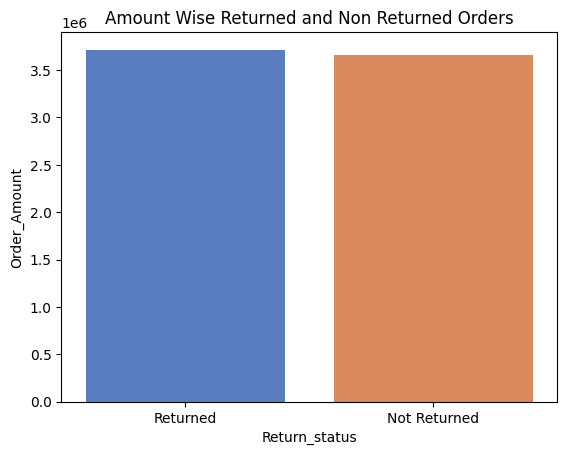

In [66]:
#Show Orders Returned vs Not Returned with their order amount?
query='Select Return_status, count(orders.order_id) as No_of_Orders, sum(order_amount) as Order_Amount from orders group by return_status'
df=pd.read_sql(query,engine)
sns.barplot(x='Return_status',y='Order_Amount',hue='Return_status',data=df,palette='muted')
plt.title('Amount Wise Returned and Non Returned Orders')

In [67]:
#Total Amount of Sales Generated?
query='Select sum(order_amount) as Total_Sales from Orders'
pd.read_sql(query,engine)

,Total_Sales
0,7376307.0


In [68]:
#What is the overall return rate?
query='Select count(Returns.Order_id)*100/count(Orders.Order_id) as Return_rate from Orders left join Returns on Returns.order_id=Orders.Order_id'
pd.read_sql(query,engine)

,Return_rate
0,50.52


In [69]:
#Calculate return orders per category?
query='Select product_category, count(returns.order_id) as No_of_returns from Orders inner join returns on returns.order_id=orders.order_id group by product_category'
pd.read_sql(query,engine)

,product_category,No_of_returns
0,Clothing,1049
1,Books,1034
2,Electronics,1011
3,Home,995
4,Toys,963


In [70]:
#Calculate return orders % per category?
query='Select product_category, count(returns.order_id) as No_of_returns,(count(returns.order_id)*100/count(Orders.order_id)) as Return_Rate from Orders left join returns on returns.order_id=orders.order_id group by product_category'
pd.read_sql(query,engine)

,product_category,No_of_returns,Return_Rate
0,Clothing,1049,52.4500
1,Books,1034,50.6614
2,Toys,963,49.5370
3,Electronics,1011,50.9320
4,Home,995,49.0148


Text(0.5, 1.0, 'Category Wise Returns')

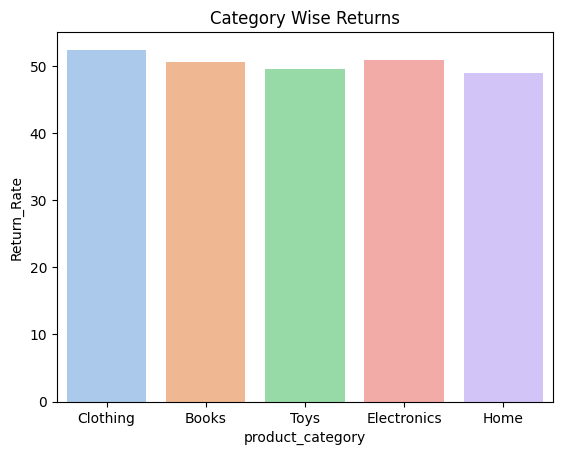

In [71]:
#Calculate return orders % per category?
query='Select product_category, count(returns.order_id) as No_of_returns,(count(returns.order_id)*100/count(Orders.order_id)) as Return_Rate from Orders left join returns on returns.order_id=orders.order_id group by product_category'
df=pd.read_sql(query,engine)
sns.barplot(x='product_category',y='Return_Rate',hue='product_category',data=df,palette='pastel')
plt.title('Category Wise Returns')

In [72]:
#Calculate return orders % gender wise?
query='Select user_gender, Count(Returns.order_id) as No_of_Returns, Count(Returns.order_id)*100/Count(Orders.Order_id) as Return_Rate from Orders left join returns on returns.order_id=orders.order_id group by user_gender'
pd.read_sql(query,engine)

,user_gender,No_of_Returns,Return_Rate
0,Male,2497,50.4648
1,Female,2555,50.5740


In [73]:
#Calculate return behaviour age wise?
query='Select User_age,count(returns.order_id) as No_of_Returns from orders left join returns on returns.order_id=orders.order_id group by user_age order by No_of_returns desc'
pd.read_sql(query,engine)

,User_age,No_of_Returns
0,57,122
1,23,117
2,66,111
3,68,108
4,31,107
5,62,106
6,56,106
7,59,104
8,24,104
9,37,103


In [74]:
#Which regions or cities have the highest return rates?
query='Select user_city, user_country, count(returns.order_id) as No_of_Returns, count(Returns.order_id)/count(orders.order_id)*100 as Return_Rate from Returns right join orders on orders.order_id=returns.order_id group by user_city,user_country order by Return_Rate desc'
pd.read_sql(query,engine)

,user_city,user_country,No_of_Returns,Return_Rate
0,Sydney,Australia,364,55.0681
1,Dubai,UAE,344,51.8854
2,Yishun,Singapore,165,51.7241
3,Toronto,Canada,349,51.7037
4,London,UK,317,51.5447
5,Paris,France,348,51.1765
6,Jurong,Singapore,46,51.1111
7,Berlin,Germany,337,51.0606
8,Los Angeles,USA,339,50.6726
9,New York,USA,362,50.5587


Text(0.5, 1.0, 'Region wise Return Rates')

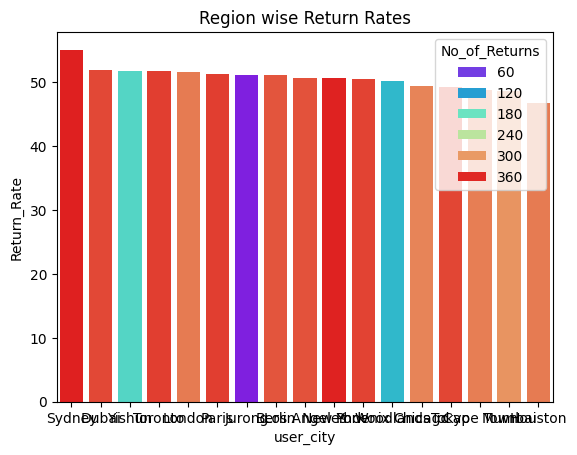

In [75]:
#Which regions or cities have the highest return rates?
query='Select user_city, user_country, count(returns.order_id) as No_of_Returns, count(Returns.order_id)/count(orders.order_id)*100 as Return_Rate from Returns right join orders on orders.order_id=returns.order_id group by user_city,user_country order by Return_Rate desc'
df=pd.read_sql(query,engine)
sns.barplot(x='user_city',y='Return_Rate',hue='No_of_Returns',data=df,palette='rainbow')
plt.title('Region wise Return Rates')

In [76]:
#Show return reason along with there return amount?
query='Select Return_Reason,sum(Order_amount) as Total_Amount,Count(Returns.order_id) as No_of_Returns from Returns inner join orders on orders.order_id=returns.order_id group by Return_Reason order by Total_Amount desc'
pd.read_sql(query,engine)

,Return_Reason,Total_Amount,No_of_Returns
0,Defective,960241.0,1327
1,Wrong item,931141.0,1258
2,Changed mind,919933.0,1255
3,Not as described,903806.0,1212


Text(0.5, 1.0, 'Returned Order with Return Reason')

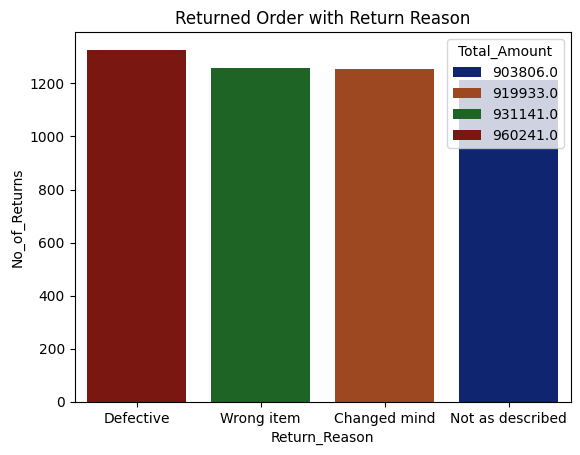

In [77]:
#Show return reason along with there return amount?
query='Select Return_Reason,sum(Order_amount) as Total_Amount,Count(Returns.order_id) as No_of_Returns from Returns inner join orders on orders.order_id=returns.order_id group by Return_Reason order by Total_Amount desc'
df=pd.read_sql(query,engine)
sns.barplot(x='Return_Reason',y='No_of_Returns',hue='Total_Amount',data=df,palette='dark')
plt.title('Returned Order with Return Reason')

In [78]:
#Does Shipping Method affects Return Rate?
query='Select Shipping_Method, count(returns.order_id) as No_of_Returns,Count(returns.order_id)*100/count(orders.order_id) as Return_Rate from orders left join returns on returns.order_id=orders.order_id group by Shipping_method'
pd.read_sql(query,engine)

,Shipping_Method,No_of_Returns,Return_Rate
0,Next-Day,1734,51.0902
1,Express,1651,49.9395
2,Standard,1667,50.5152


Text(0.5, 1.0, 'Return Rate based on Shipping Method')

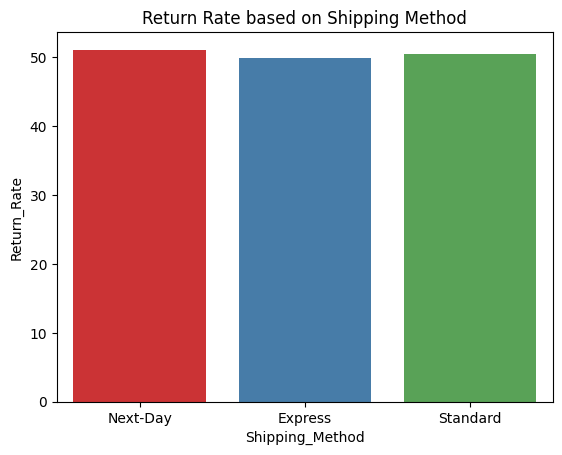

In [79]:
#Does Shipping Method affects Return Rate?
query='Select Shipping_Method, count(returns.order_id) as No_of_Returns,Count(returns.order_id)*100/count(orders.order_id) as Return_Rate from orders left join returns on returns.order_id=orders.order_id group by Shipping_method'
df=pd.read_sql(query,engine)
sns.barplot(x='Shipping_Method',y='Return_Rate',hue='Shipping_Method',data=df,palette='Set1')
plt.title('Return Rate based on Shipping Method')

In [80]:
#What is the average time between order and return?
query='Select Avg(days_to_return) as Avg_Return_Time from Returns'
pd.read_sql(query,engine)

,Avg_Return_Time
0,15.1302


<Axes: xlabel='count', ylabel='Avg_Return_Time'>

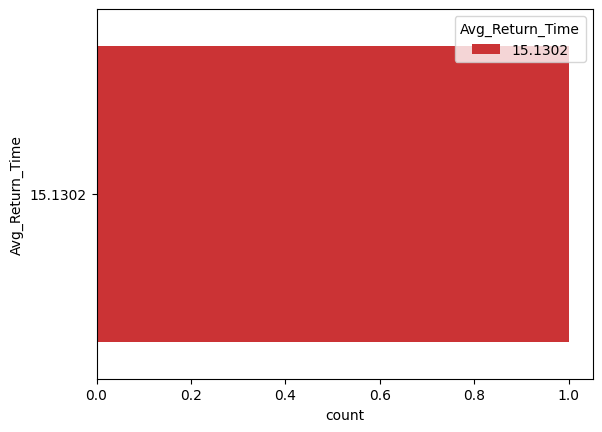

In [81]:
#What is the average time between order and return?
query='Select Avg(days_to_return) as Avg_Return_Time from Returns'
df=pd.read_sql(query,engine)
sns.countplot(y='Avg_Return_Time', hue='Avg_Return_Time', data=df, palette='Set1')

In [82]:
#Which product category have the highest return rates?
query='Select product_category, count(returns.order_id) as No_of_returns,(count(returns.order_id)*100/count(Orders.order_id)) as Return_Rate from Orders left join returns on returns.order_id=orders.order_id group by product_category limit 1'
pd.read_sql(query,engine)

,product_category,No_of_returns,Return_Rate
0,Clothing,1049,52.45


In [83]:
#What is the average order value (AOV) of returned vs. non-returned orders?
query='Select Return_status, Avg(order_amount) as Avg_Order_value from orders group by return_status'
pd.read_sql(query,engine)

,Return_status,Avg_Order_value
0,Returned,735.3763
1,Not Returned,739.9325


Text(0.5, 1.0, 'Average Order Value Returned Vs Non Returned')

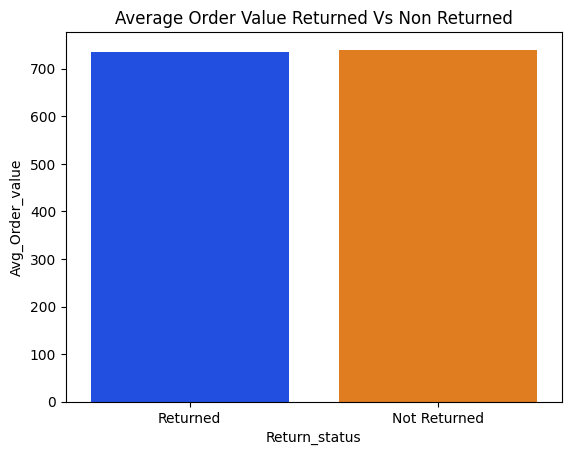

In [84]:
#What is the average order value (AOV) of returned vs. non-returned orders?
query='Select Return_status, Avg(order_amount) as Avg_Order_value from orders group by return_status'
df=pd.read_sql(query,engine)
sns.barplot(x='Return_status',y='Avg_Order_value',hue='Return_status',data=df,palette='bright')
plt.title('Average Order Value Returned Vs Non Returned')

In [85]:
#Does Payment Method affects Return Rate?
query='Select Payment_Method, count(returns.order_id) as No_of_Returns,Count(returns.order_id)*100/count(orders.order_id) as Return_Rate from orders left join returns on returns.order_id=orders.order_id group by Payment_method order by return_rate desc'
pd.read_sql(query,engine)

,Payment_Method,No_of_Returns,Return_Rate
0,Gift Card,1309,51.5964
1,Debit Card,1283,51.1155
2,Credit Card,1249,50.5055
3,PayPal,1211,48.8306


Text(0.5, 1.0, 'Return Rate based on Payment Method')

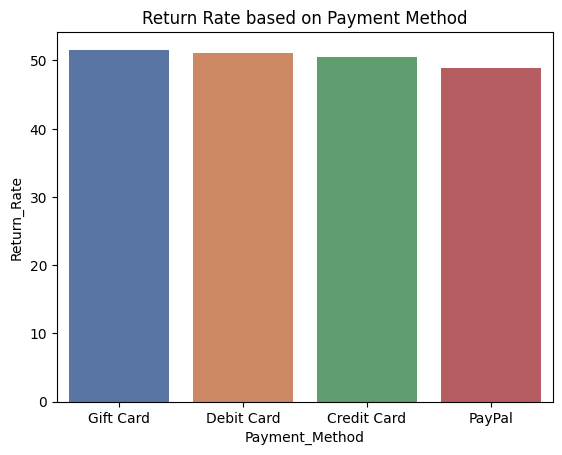

In [86]:
#Does Payment Method affects Return Rate?
query='Select Payment_Method, count(returns.order_id) as No_of_Returns,Count(returns.order_id)*100/count(orders.order_id) as Return_Rate from orders left join returns on returns.order_id=orders.order_id group by Payment_method order by return_rate desc'
df=pd.read_sql(query,engine)
sns.barplot(x='Payment_Method',y='Return_Rate',hue='Payment_Method',data=df,palette='deep')
plt.title('Return Rate based on Payment Method')

In [87]:
#Total Return Amount vs Non Return Amount?
query='Select Return_Status, sum(order_amount) as Total_Amount from Orders group by return_status'
pd.read_sql(query,engine)

,Return_Status,Total_Amount
0,Returned,3715121.0
1,Not Returned,3661186.0


Text(0.5, 1.0, 'Amount Wise Return Status')

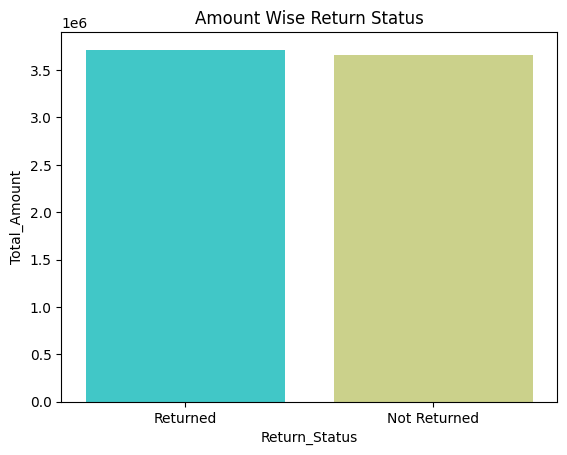

In [88]:
#Total Return Amount vs Non Return Amount?
query='Select Return_Status, sum(order_amount) as Total_Amount from Orders group by return_status'
df=pd.read_sql(query,engine)
sns.barplot(x='Return_Status',y='Total_Amount',hue='Return_Status',data=df, palette='rainbow')
plt.title('Amount Wise Return Status')

In [89]:
df_Orders

,ORDER_ID,PRODUCT_ID,USER_ID,ORDER_DATE,PRODUCT_CATEGORY,PRODUCT_PRICE,ORDER_QUANTITY,USER_AGE,USER_GENDER,USER_CITY,USER_COUNTRY,PAYMENT_METHOD,SHIPPING_METHOD,DISCOUNT_APPLIED,RETURN_STATUS,ORDER_AMOUNT,USER_GENDER_BINARY,RETURN_STATUS_BINARY
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,Clothing,412,3,58,Male,New York,USA,Debit Card,Next-Day,45,Returned,1190,1,1
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,Books,289,3,68,Female,London,UK,Credit Card,Express,48,Returned,819,0,1
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,Toys,390,5,22,Female,Tokyo,Japan,Debit Card,Next-Day,27,Not Returned,1924,0,0
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,Toys,401,3,40,Male,Paris,France,PayPal,Next-Day,15,Not Returned,1188,1,0
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,Books,110,4,34,Female,Tokyo,Japan,Gift Card,Standard,16,Not Returned,424,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD00009995,PROD00009995,USER00009995,2023-10-20,Home,143,4,37,Male,Woodlands,Singapore,PayPal,Standard,34,Not Returned,536,1,0
9996,ORD00009996,PROD00009996,USER00009996,2023-02-25,Electronics,485,3,69,Male,Phoenix,USA,Debit Card,Express,25,Not Returned,1428,1,0
9997,ORD00009997,PROD00009997,USER00009997,2024-05-10,Toys,387,5,46,Male,Mumbai,India,Credit Card,Next-Day,13,Not Returned,1920,1,0
9998,ORD00009998,PROD00009998,USER00009998,2024-02-13,Toys,129,1,34,Female,Berlin,Germany,Gift Card,Express,50,Not Returned,79,0,0


In [90]:
X=df_Orders[['USER_AGE','USER_GENDER_BINARY']]
y=df_Orders[['RETURN_STATUS_BINARY']]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr=LogisticRegression()

In [95]:
lr.fit(X_train,y_train)

LogisticRegression()

In [96]:
predict=lr.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,576,1051
Actual Yes,643,1030


In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.47      0.35      0.40      1627
           1       0.49      0.62      0.55      1673

    accuracy                           0.49      3300
   macro avg       0.48      0.48      0.48      3300
weighted avg       0.48      0.49      0.48      3300

